In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Testing Accuracy and Data Visualization:

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.iloc[:, :2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
label_counts=df['v1'].value_counts()
label_counts

ham     4825
spam     747
Name: v1, dtype: int64

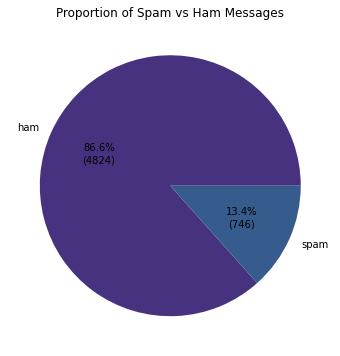

In [6]:
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(label_counts) / 100)})', colors=sns.color_palette('viridis'))
plt.title('Proportion of Spam vs Ham Messages')
plt.show()

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
def preprocess_text(text, stop_words):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalpha()]  # Remove non-alphabetic characters
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize
    return " ".join(words)

In [10]:
df['v2'] = df['v2'].apply(lambda x: preprocess_text(x, stop_words))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
tfidf_features = cv.fit_transform(df['v2'])

In [12]:
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=cv.get_feature_names_out())

In [13]:
def top_variance_features(df, features, top_n=15):
    # Exclude the target column
    # Calculate the variance of each feature
    variances = features.var()

    # Select the top N features with the highest variance
    top_variances = variances.nlargest(top_n)

    # Plot the top features
    plt.figure(figsize=(10, 6))
    top_variances.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Features with Highest Variance')
    plt.xlabel('Feature')
    plt.ylabel('Variance')
    plt.show()

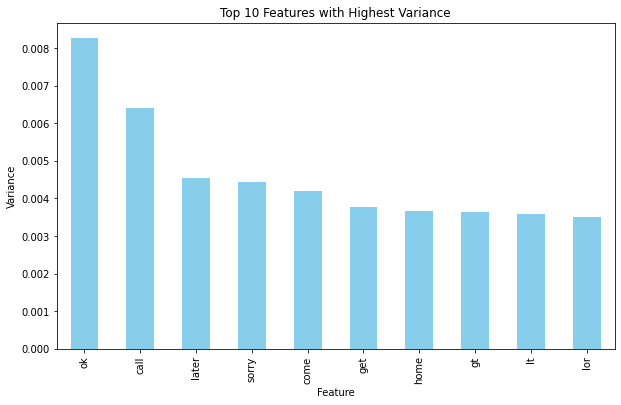

In [14]:
top_variance_features(df, tfidf_df, top_n=10)

In [15]:
df = pd.concat([df, tfidf_df], axis=1)

In [16]:
df = df.drop('v2', axis=1)

In [17]:
df

,v1,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,åôrents,ìä,ìï
0,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.replace(to_replace='spam', value=1, inplace=True)
df.replace(to_replace='ham', value=0, inplace=True)

In [19]:
df

,v1,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,åôrents,ìä,ìï
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#df['it'].max()

In [21]:
Y=df['v1']

In [22]:
X=df.drop('v1', axis=1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test,y_train, y_test = train_test_split(X,Y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
logreg = LogisticRegression()
start1=time.time()
logreg.fit(X_train, y_train)
end1=time.time()
time1=end1-start1
y_pred = logreg.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [28]:
accuracy#accuracy for Logistic Regression

0.9483129935391242

In [29]:
precision

0.9763779527559056

In [30]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

In [31]:
start2=time.time()
svm_model.fit(X_train, y_train)
end2=time.time()
time2=end2-start2
y_pred = svm_model.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)

In [32]:
accuracy1#accuracy for Support Vector Machines

0.9712849964106246

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=35)
start3=time.time()
knn_model.fit(X_train, y_train)
end3=time.time()
time3=end3-start3
y_pred = knn_model.predict(X_test)

In [34]:
accuracy2 = accuracy_score(y_test, y_pred)

In [35]:
accuracy2 #accuracy of K Nearest Neighbours

0.9073941134242641

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb_model = GaussianNB()
start4=time.time()
nb_model.fit(X_train, y_train)
end4=time.time()

time4=end4-start4
# Make predictions on the test data
y_pred = nb_model.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)

In [38]:
accuracy3#accuracy for Naive Bais Classifier

0.8693467336683417

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [40]:
clf = RandomForestClassifier(random_state=42)
start5=time.time()
clf.fit(X_train, y_train)
end5=time.time()
time5=end5-start5

In [41]:
y_pred = clf.predict(X_test)
accuracy4=accuracy_score(y_test, y_pred)

In [42]:
accuracy4

0.9655419956927495

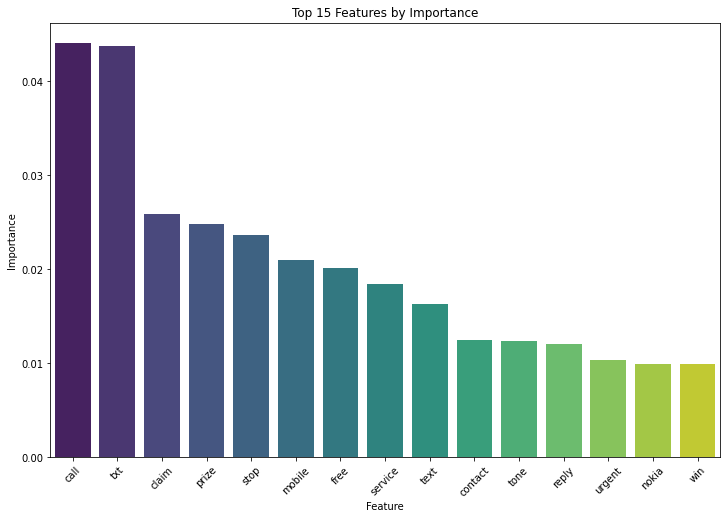

In [43]:
feature_importances = clf.feature_importances_

# Map feature names to their importance scores
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top 15 features
top_15_features = sorted_features[:15]

# Plot the top features
plt.figure(figsize=(12, 8))
sns.barplot(x=[f[0] for f in top_15_features], y=[f[1] for f in top_15_features], palette='viridis')
plt.title('Top 15 Features by Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

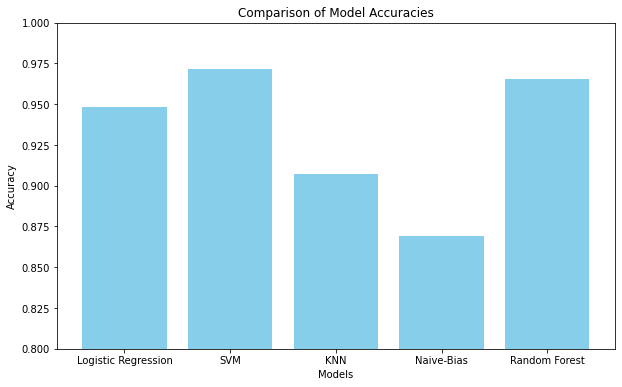

In [44]:
accuracies = [accuracy,accuracy1, accuracy2, accuracy3, accuracy4]
models = ['Logistic Regression', 'SVM','KNN', 'Naive-Bias','Random Forest']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)  # Assuming accuracy values are between 0 and 1
plt.show()

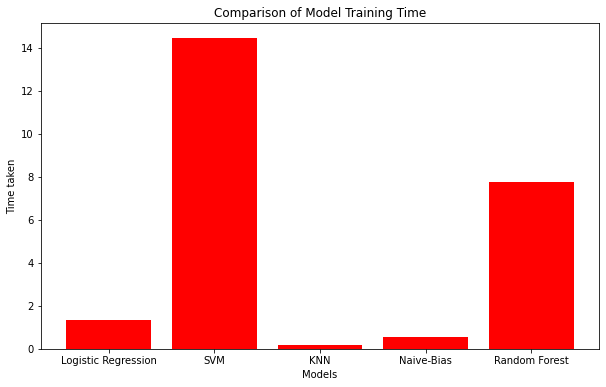

In [45]:
accuracies = [time1,time2,time3, time4, time5]
models = ['Logistic Regression', 'SVM','KNN', 'Naive-Bias','Random Forest']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='red')
plt.title('Comparison of Model Training Time')
plt.xlabel('Models')
plt.ylabel('Time taken')
#plt.ylim(0.8, 1)  # Assuming accuracy values are between 0 and 1
plt.show()

As shown above K Nearest Neighbours shows the least training time while having decent accuracy. This makes it the optimal choice for real time training 


# Spam Classifier with Input:

In [46]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [47]:
df = df.iloc[:, :2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
Y=df['v1']
X=df.drop('v1', axis=1)

In [49]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [50]:
def preprocess_text(text, stop_words):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalpha()]  # Remove non-alphabetic characters
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize
    return " ".join(words)

In [51]:
inp=input("Enter sentence to check in spam or not")

Enter sentence to check in spam or notthis is epic


replacing last row the inpu


In [52]:
X.loc[X.index[-1], 'v2'] = inp

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
tfidf_features = cv.fit_transform(X['v2'])

In [54]:
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=cv.get_feature_names_out())

In [55]:
inp=tfidf_df.iloc[-1]


In [56]:
X=tfidf_df.iloc[:-1]
X

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
Y=Y.iloc[:-1]

In [58]:
Y.replace(to_replace='spam', value=1, inplace=True)
Y.replace(to_replace='ham', value=0, inplace=True)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test,y_train, y_test = train_test_split(X,Y,
                                   random_state=104, 
                                   test_size=0.10, 
                                   shuffle=True)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=35)
knn_model.fit(X,Y)
y_pred = knn_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
inp=[inp]

In [63]:
if(knn_model.predict(inp)[0]==1):
    print("spam message recieved")
else:
    print("not spam message")

not spam message


/home/anish/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
